---
# What are Embeddings?
### `Think of embeddings as a way to translate words into a language that computers understand - numbers!`

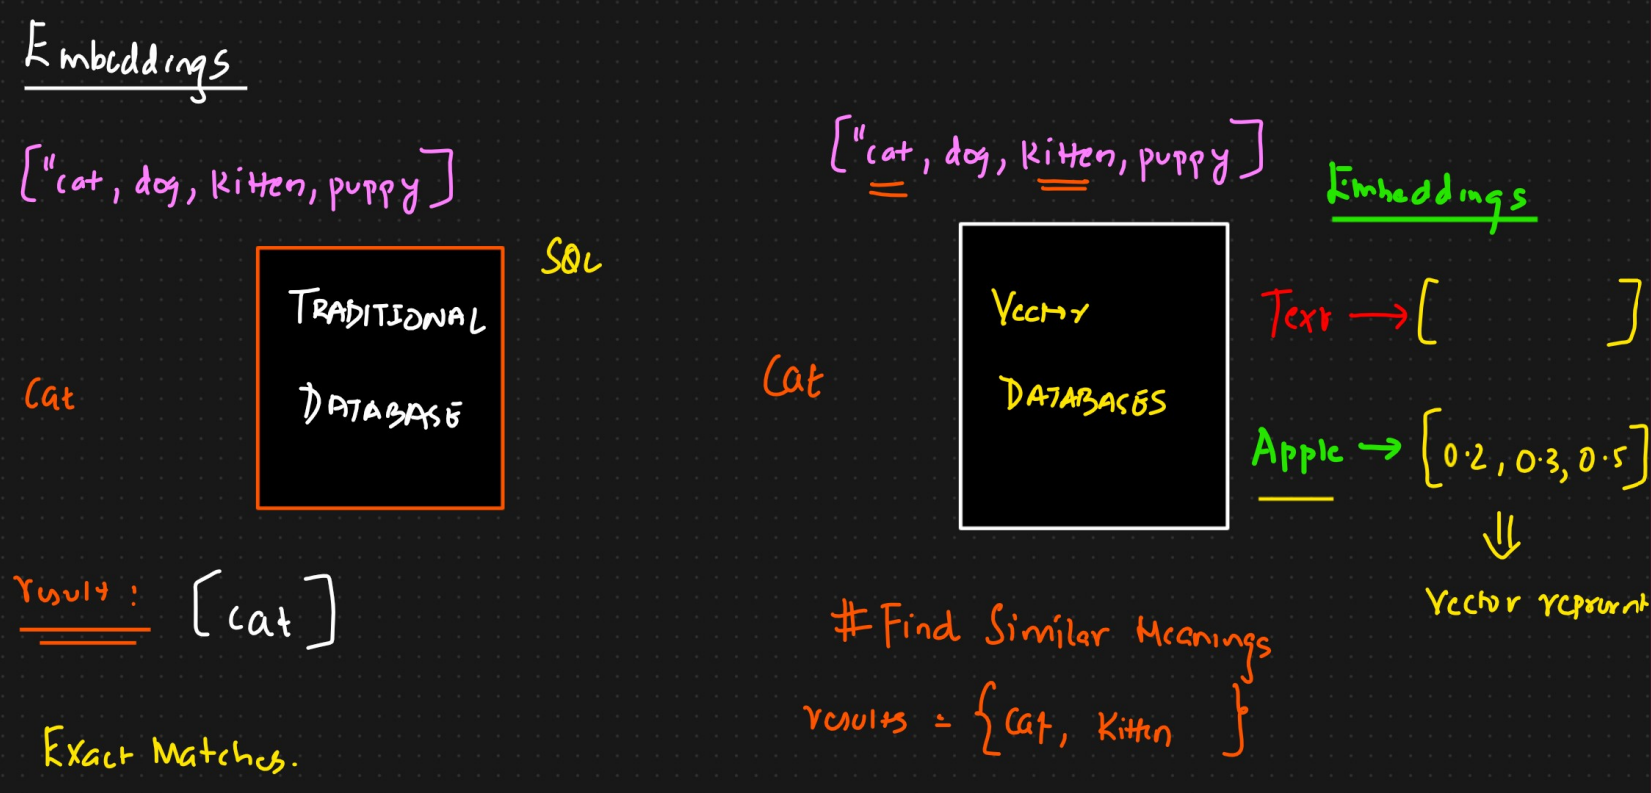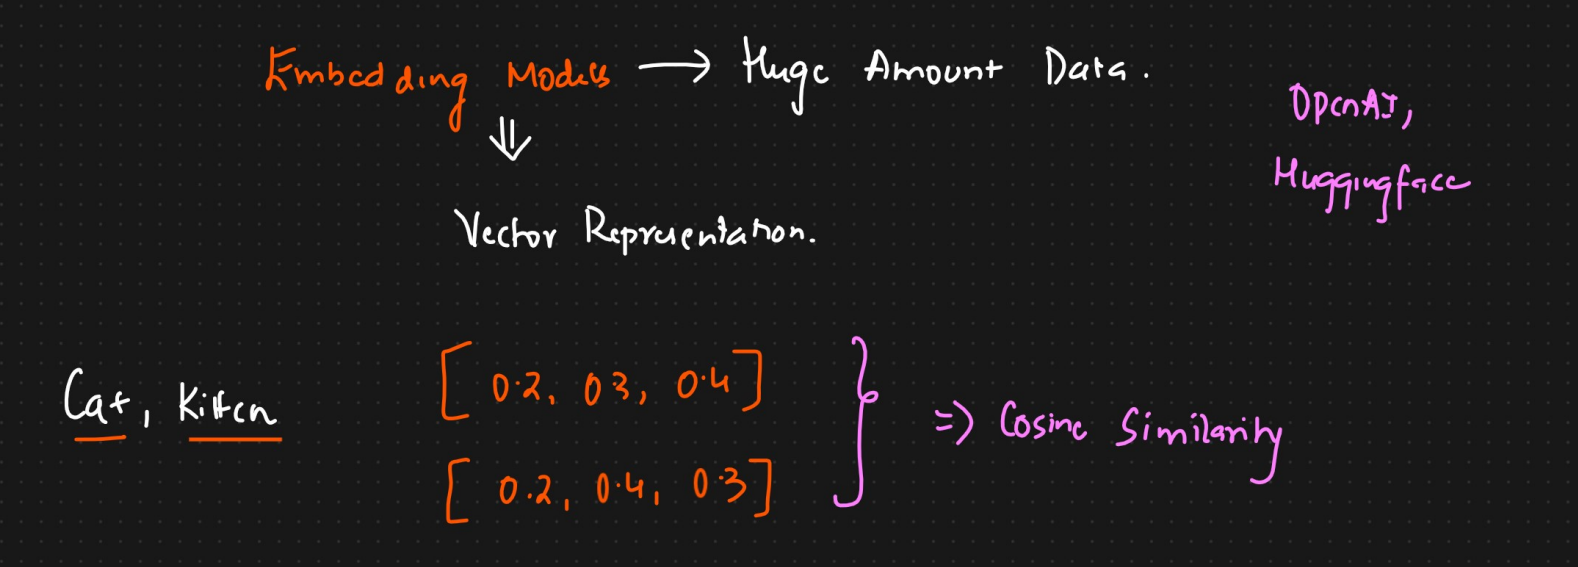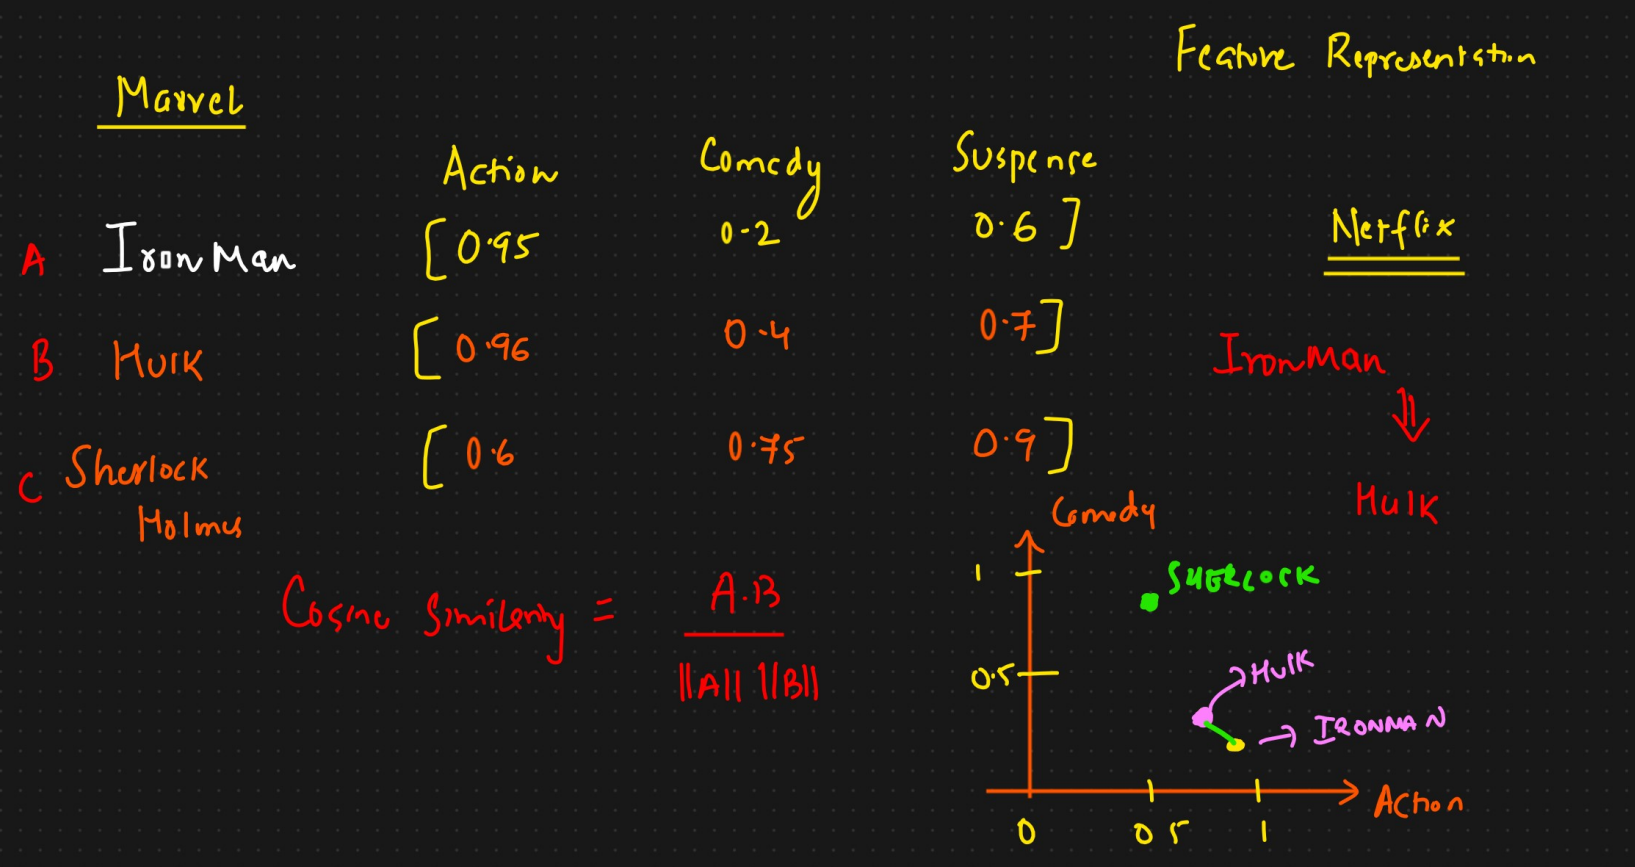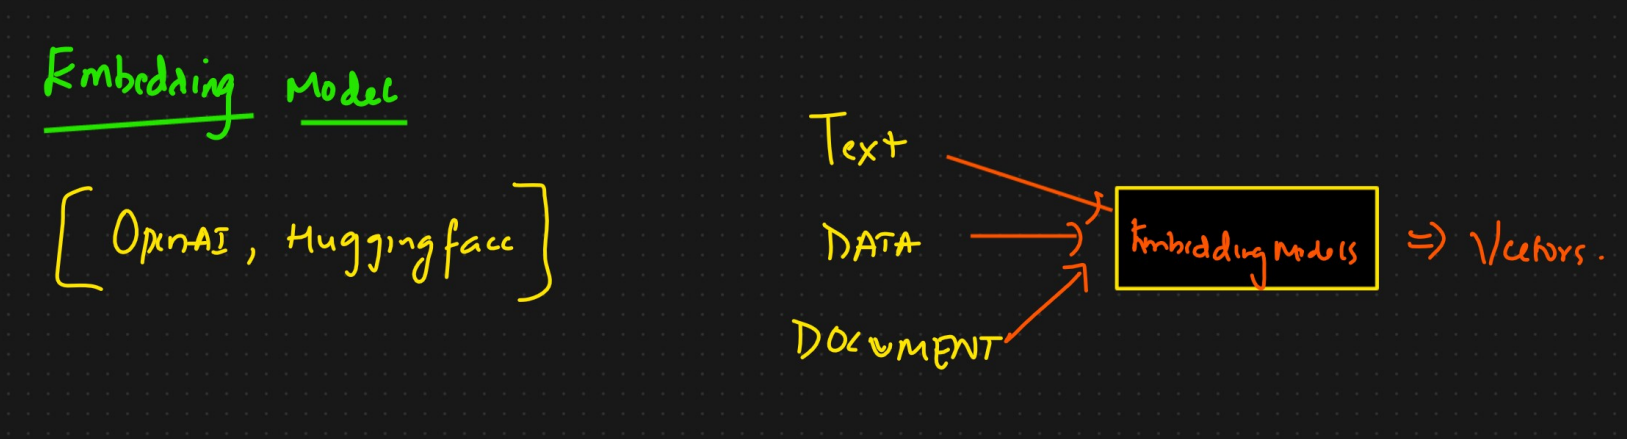

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

----

##  `Simplified 2D example (real embeddings have hundreds of dimensions)`


In [3]:
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

In [4]:
word_embeddings

{'cat': [0.8, 0.6],
 'kitten': [0.75, 0.65],
 'dog': [0.7, 0.3],
 'puppy': [0.65, 0.35],
 'car': [-0.5, 0.2],
 'truck': [-0.45, 0.15]}

---

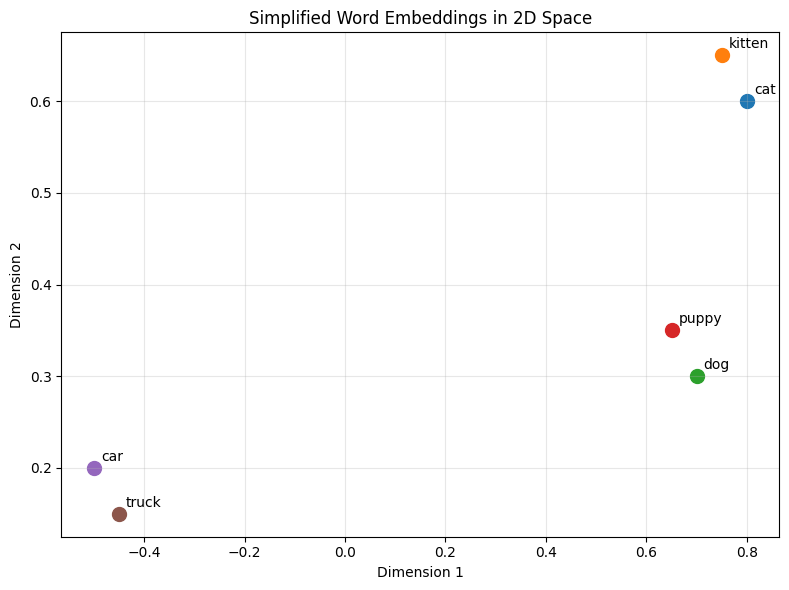

In [5]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## `Measuring Similarity`
Cosine similarity measures the angle between two vectors.
- Result close to 1: Very similar
- Result close to 0: Not related
- Result close to -1: Opposite meanings

In [6]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

---

## `Example-1 👉 Result close to 1: Very similar`

In [7]:
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]

cat_kitten_similarity = cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


## `Example-2 👉 Result close to -1: Opposite meanings`


In [ ]:
cat_vector = [0.8, 0.6, 0.3]
car_vector = [-0.5, 0.2, 0.1]

cosine_similarity(cat_vector, car_vector)

np.float64(-0.43718588548916804)

----

---
# Creating Your First Embeddings using HuggingFace

---

## 👉 [Learn more](https://huggingface.co/) 🤗 HuggingFace
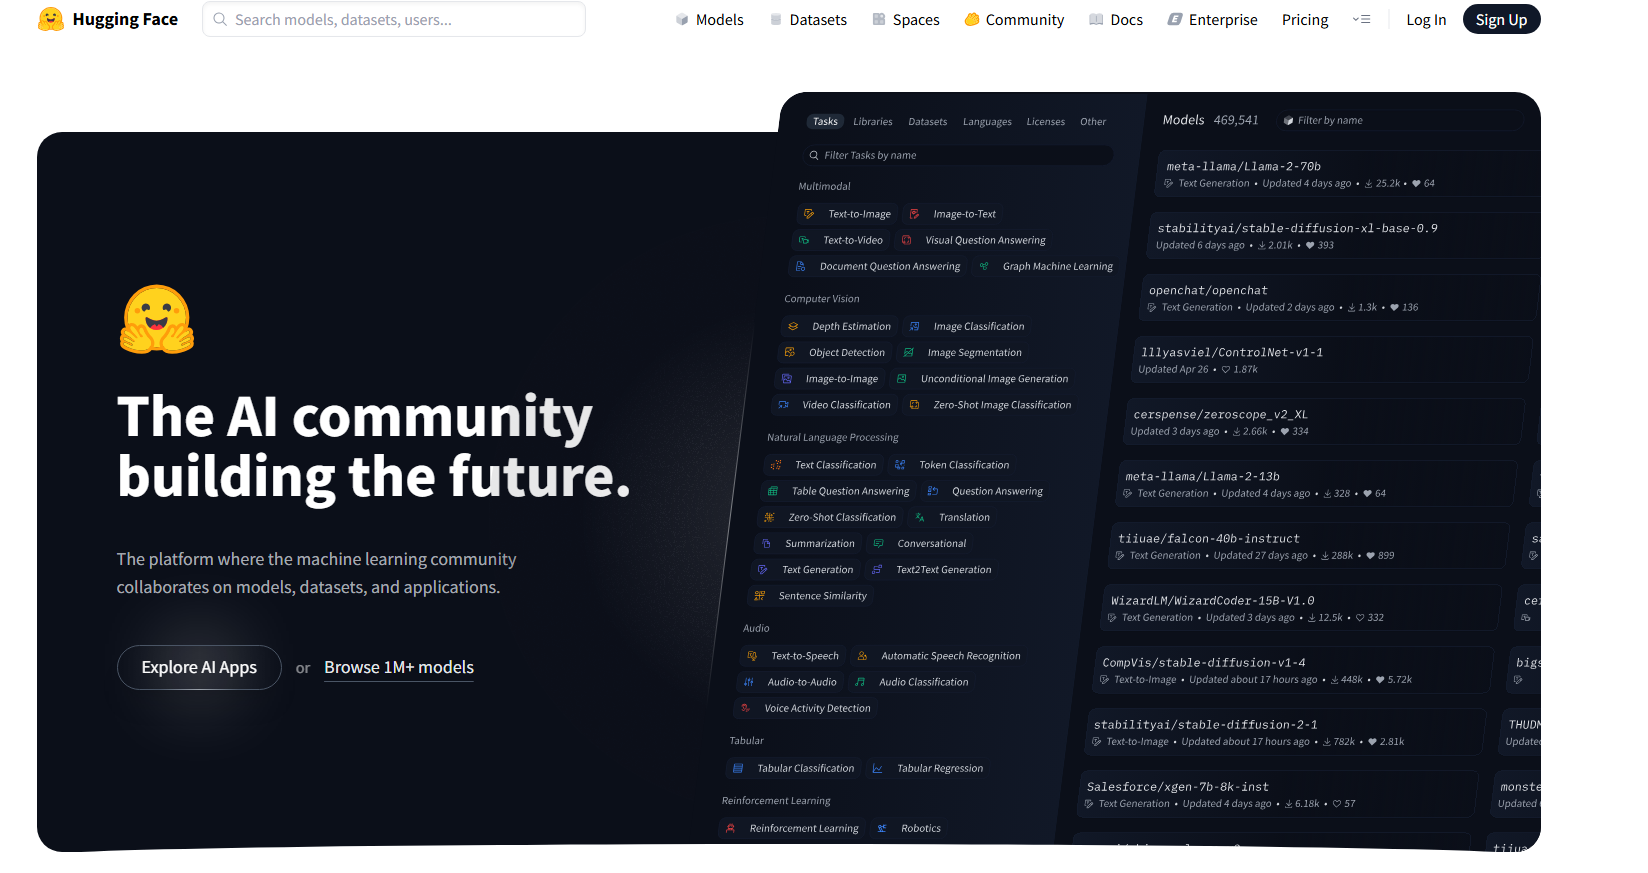!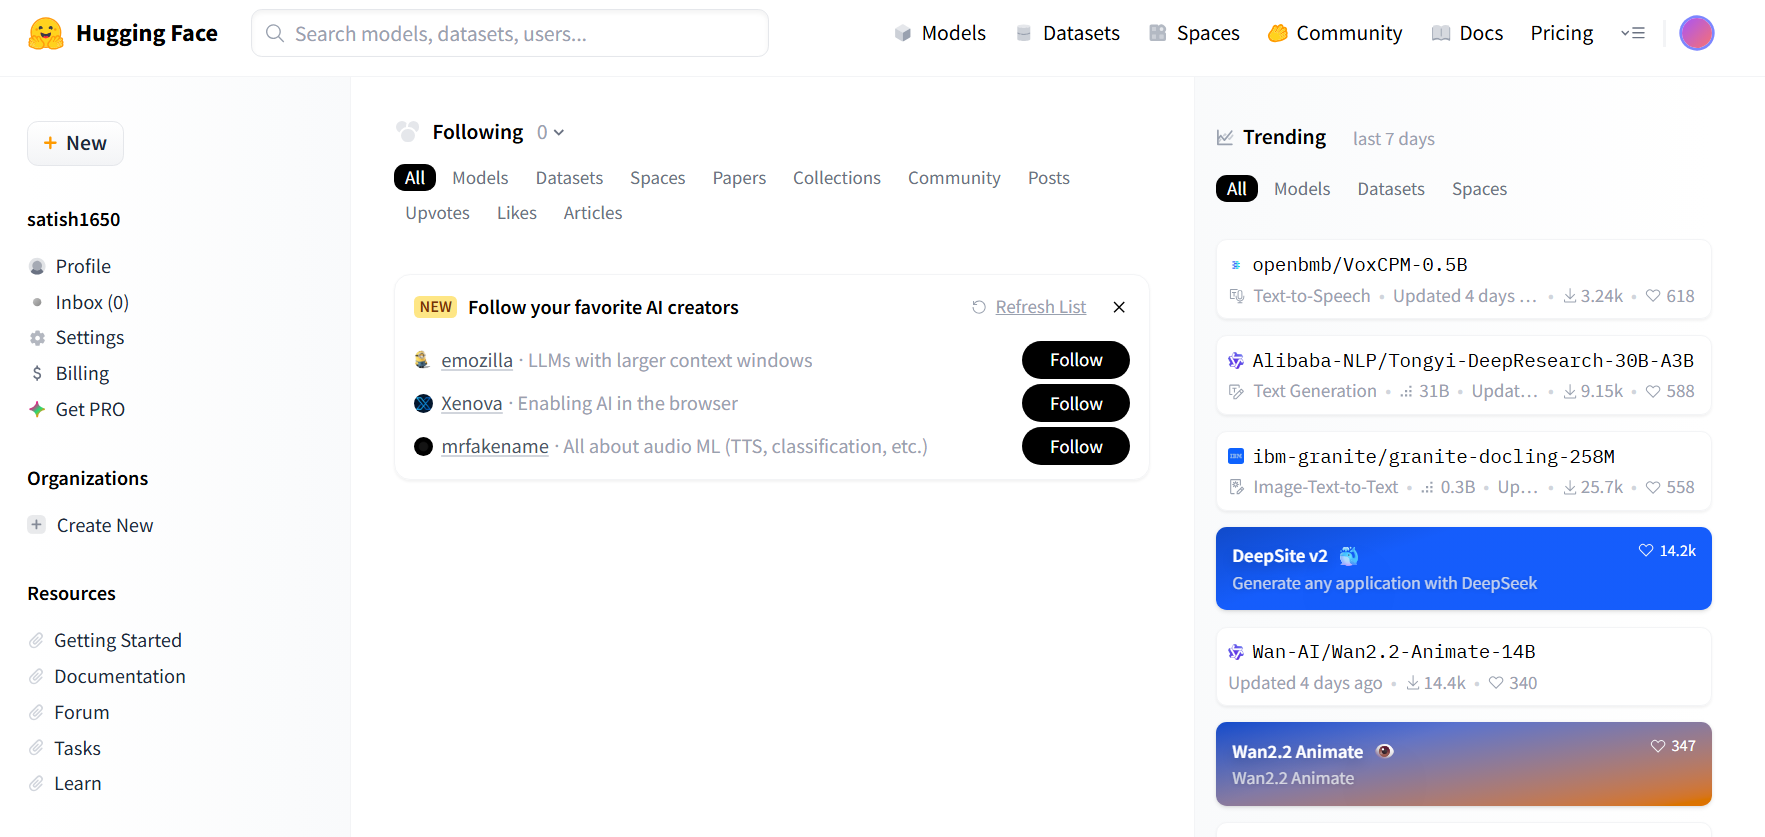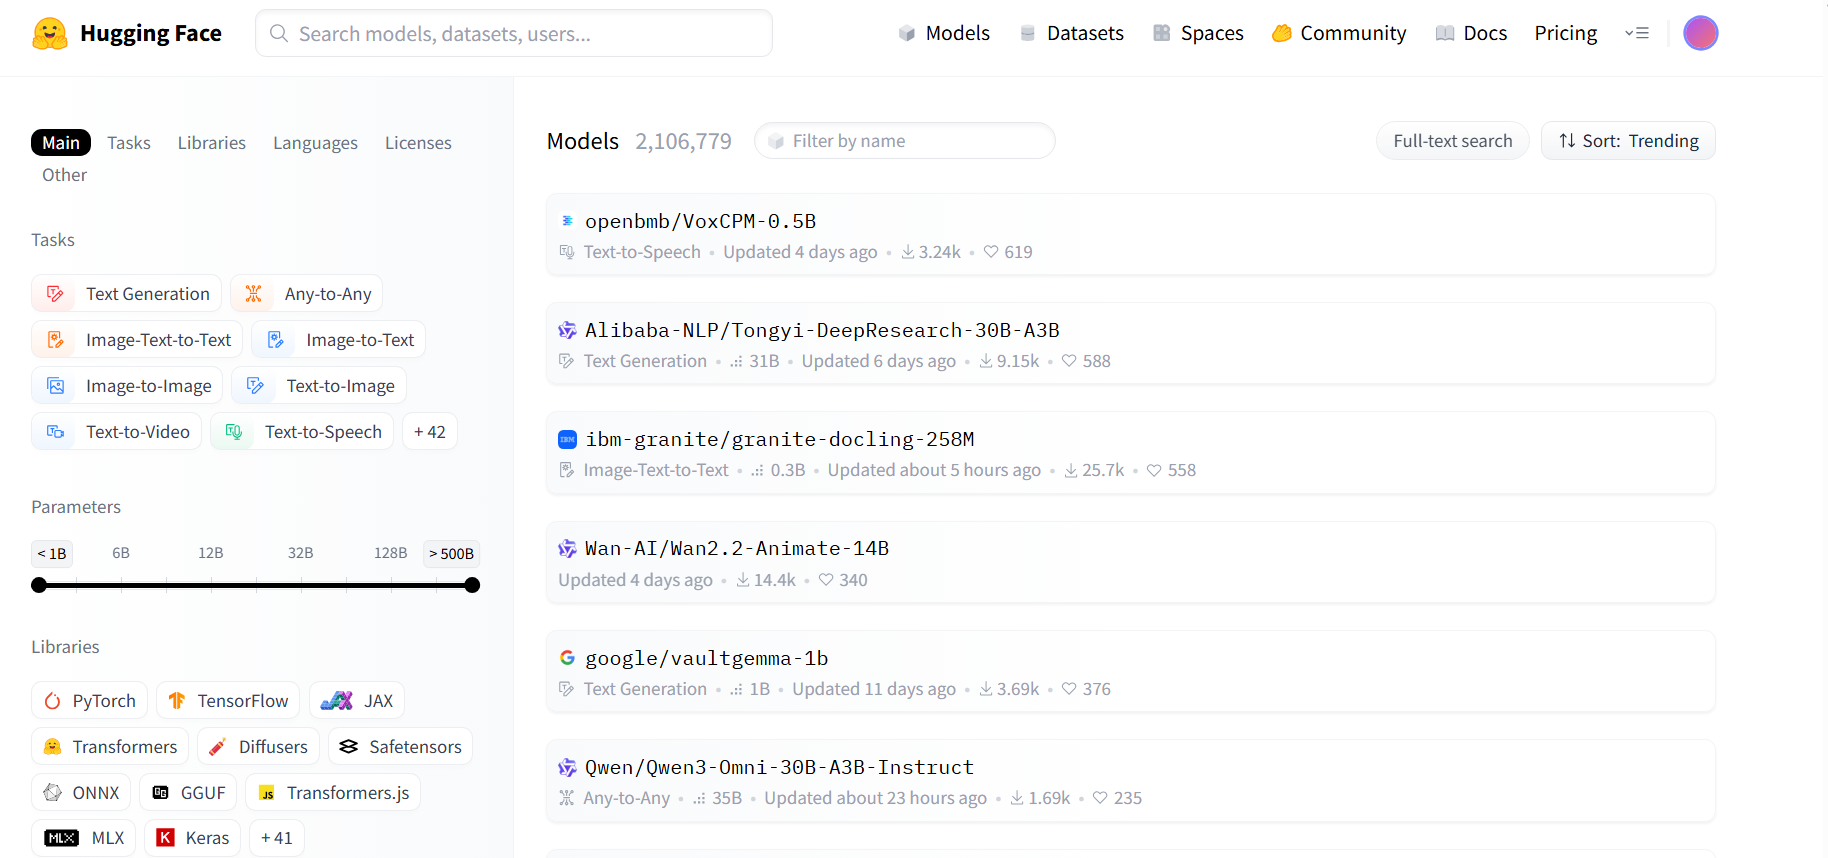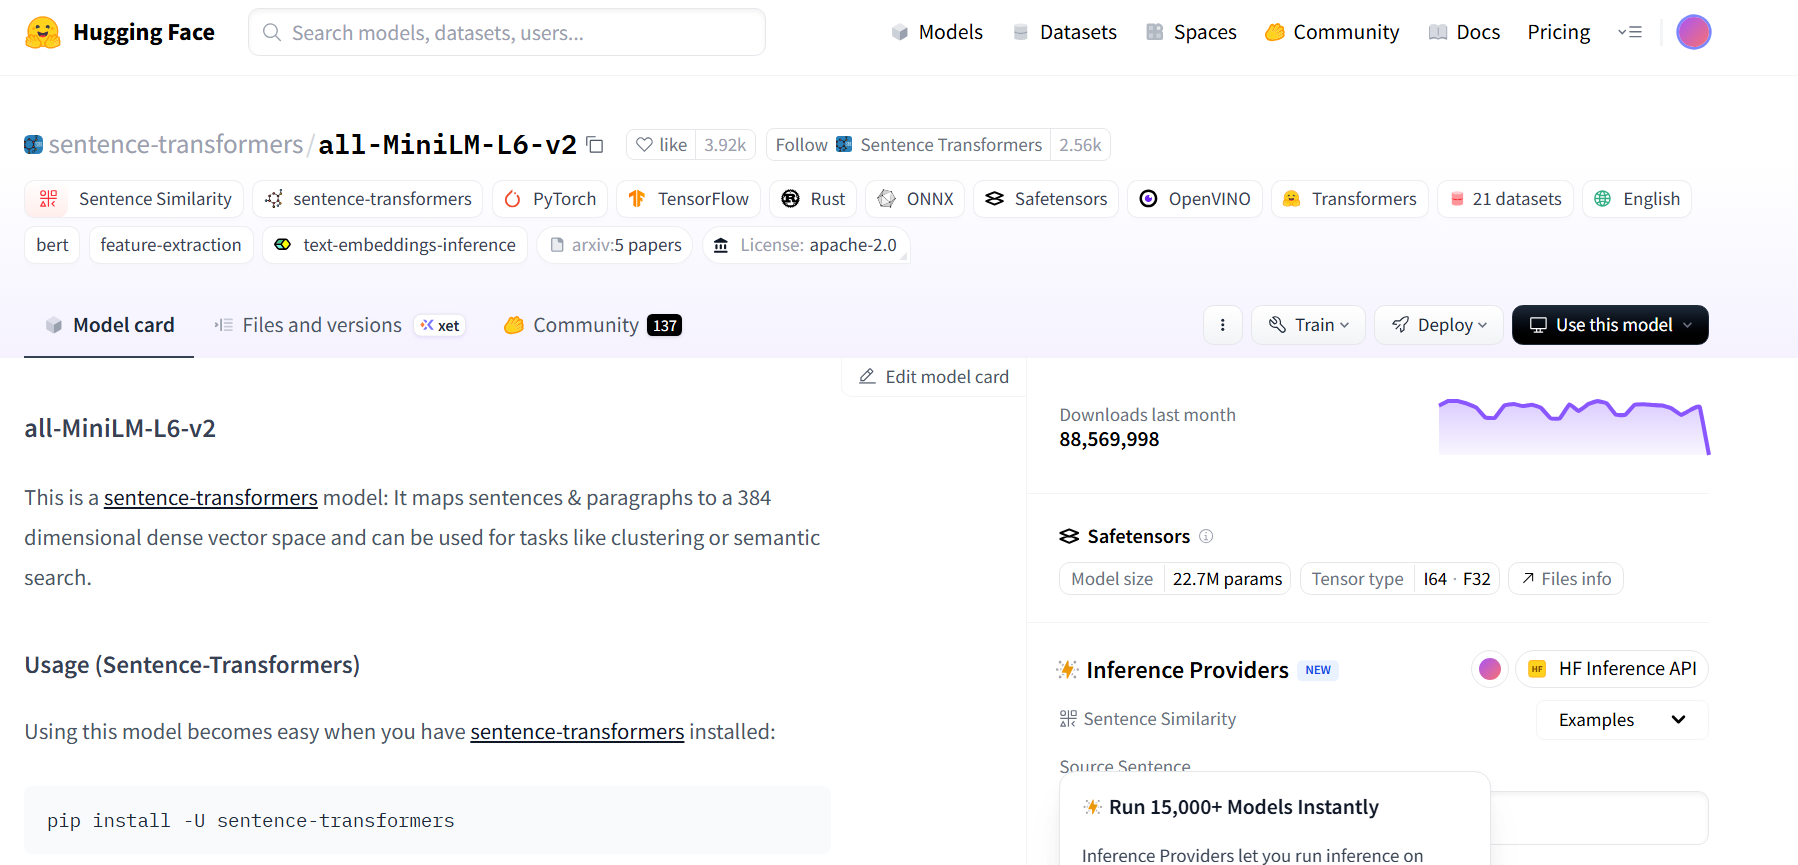

---


## 🤗 HuggingFace Models
### HuggingFaceEmbeddings 👉 [Learn more](https://python.langchain.com/api_reference/huggingface/embeddings/langchain_huggingface.embeddings.huggingface.HuggingFaceEmbeddings.html)

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

# Initialize a simple Embedding model(no API Key needed!)
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

embeddings

c:\Satish\RAG Pipelines\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

---

## Create your first embeddings

In [ ]:
text = "Hello, I am learning about embeddings!"

embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding Length : {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embeddings!
Embedding Length : 384
[-0.01816326379776001, -0.09955169260501862, 0.013816063292324543, -0.00812596082687378, 0.014152281917631626, 0.0640648901462555, -0.006253376137465239, -0.0030178879387676716, 0.02528725564479828, -0.020198656246066093, 0.024329712614417076, 0.07435061782598495, 0.05117720365524292, 0.02203848399221897, -0.05830618366599083, 0.015268256887793541, 0.02358434721827507, 0.09455389529466629, -0.06508845090866089, 0.013296686112880707, -0.02049756608903408, -0.05690854415297508, 0.030303286388516426, -0.08365616202354431, 0.026596324518322945, -0.015231472440063953, -0.04361540451645851, 0.053984012454748154, 0.09025716036558151, -0.08893880993127823, 0.03964460641145706, -0.008835036307573318, -0.030343767255544662, 0.07425566762685776, -0.05409920588135719, 0.11108000576496124, 0.03689984232187271, -0.008959880098700523, -0.06140244007110596, -0.003143378533422947, 0.021958207711577415, 0.04220817983150482, -0.028937924

In [7]:
sentences = [
    "The cat sat on the mat",
    "A feling rested on the rug",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

sentences

['The cat sat on the mat',
 'A feling rested on the rug',
 'The dog played in the yard',
 'I love programming in Python',
 'Python is my favorite programming language']

In [12]:
embedding_sentence = embeddings.embed_documents(sentences)

print(embedding_sentence)

[[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.018661130

In [13]:
print(embedding_sentence[0])
print(embedding_sentence[1])
print(embedding_sentence[2])
print(embedding_sentence[3])
print(embedding_sentence[4])

[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.0186611302

---

In [15]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

sentences

['The cat sat on the mat',
 'The cat sat on the mat',
 'The dog played in the yard',
 'I love programming in Python',
 'Python is my favorite programming language']

### `If we have same sentence then we will get same embeddings`

In [16]:
embedding_sentence = embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.0186611302

----

## Popular models comparison

In [18]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications



---